# Using Semantic Link in Fabric to Unlock Semantic Models
### Stephanie Bruno | BI Architect at iLink Digital
#### [LinkedIn: aka.ms/stephanie](https://www.linkedin.com/in/brunostephanie/)
#### [data-witches.com](https://data-witches.com/)

##### With semantic link in Fabric, we can unlock Power BI semantic models using Python in notebooks. Prior to semantic link, our options for accessing the data and measures in a semantic model (the model formerly known as a dataset) were limited to Power BI desktop, DAX Studio, or Excel. Now we can query the model data and metadata using Python, and even take it a step further to examine the contents of workspaces and link up Power BI models with data science. In this demo you’ll see how easy it is to get started and take data analysis to the next level. 
![semantic link diagram](https://learn.microsoft.com/en-us/fabric/data-science/media/semantic-link-overview/data-flow-with-semantic-link.png)


## Semantic link can be used by multiple personas:
##### **Data scientists** can use the business logic for aggregate calculations (measures) that the analyst has developed in a semantic model, without having to duplicate it in another language. When the logic for a measure changes, the data scientist doesn't need to update their code. They can also get a flattened table, based on the dimensional model, to use in a dataframe. The data scientist can write the output of a prediction, for example, back to lakehouse tables to be included in the semantic model.
##### **Data analysts** can quickly and easily visualize relationships in multiple semantic models, can do data validation, can check measures, and can even include Power BI visuals into notebooks.
##### **Data engineers** can include model refreshes and data quality checks into their processing of notebooks.
##### **Fabric admins** can develop an inventory of workspace items, and in particular a catalog of measures with definitions.

### Getting started
##### [semantic link documentation and tutorials](https://learn.microsoft.com/en-us/fabric/data-science/semantic-link-overview)
##### [semPy package documentation](https://learn.microsoft.com/en-us/python/api/semantic-link-sempy/sempy?view=semantic-link-python)

In [29]:
%pip install semantic-link   #you'll need this if you aren't using an environment with semantic link installed

import sempy.fabric as fabric
import pandas as pd 

StatementMeta(, 91483e99-c627-4de1-8e62-ef085631977a, 46, Finished, Available)


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



In [30]:
# variables for the workspace and report we're interested in
workspace_name = "Public"
report_name = "Fabrikam Sales"
semantic_model_name = "Fabrikam Sales"
df_reports = fabric.list_reports(workspace=workspace_name)
report_id = df_reports[df_reports['Name'] == report_name]['Id'].iloc[0]

StatementMeta(, 91483e99-c627-4de1-8e62-ef085631977a, 48, Finished, Available)

### View a report

In [31]:
from powerbiclient import Report
report = Report(group_id=None, report_id=report_id)
report

StatementMeta(, 91483e99-c627-4de1-8e62-ef085631977a, 49, Finished, Available)

Report()

StatementMeta(, 91483e99-c627-4de1-8e62-ef085631977a, 50, Finished, Available)

StatementMeta(, 91483e99-c627-4de1-8e62-ef085631977a, 51, Finished, Available)

StatementMeta(, 91483e99-c627-4de1-8e62-ef085631977a, 52, Finished, Available)

StatementMeta(, 91483e99-c627-4de1-8e62-ef085631977a, 53, Finished, Available)

StatementMeta(, 91483e99-c627-4de1-8e62-ef085631977a, 60, Finished, Available)

No such comm: f5e8161438f8487ba279a21b75181e0a


### Get some info about the semantic model behind the report

In [32]:
fabric.list_tables(dataset=semantic_model_name)

StatementMeta(, 91483e99-c627-4de1-8e62-ef085631977a, 54, Finished, Available)

,Name,Description,Hidden,Data Category,Type
0,Customer,,False,,Table
1,Date,,False,Time,Table
2,Geo,,False,,Table
3,People,,False,,Table
4,PO,,False,,Table
5,Product,,False,,Table
6,Product Details,,False,,Table
7,Reseller,,False,,Table
8,Supplier,,False,,Table
9,Sales,,False,,Table


In [33]:
df_columns = fabric.list_columns(dataset=semantic_model_name)
df_columns #[["Table Name", "Column Name", "Data Type", "Hidden"]]

StatementMeta(, 91483e99-c627-4de1-8e62-ef085631977a, 55, Finished, Available)

,Table Name,Column Name,Description,Type,Data Type,Hidden,Format String,Source,Data Category,Display Folder,...,Unique,Sort By Column,Summarize By,Is Available in MDX,Encoding Hint,State,Error Message,Alternate Of Base Column,Alternate Of Base Table,Modified Time
0,Customer,CustomerID,,Data,String,False,,CustomerID,,,...,False,None,None,True,Default,Ready,,None,None,2024-05-20 14:33:41
1,Customer,Address,,Data,String,False,,Address,,,...,False,None,None,True,Default,Ready,,None,None,2024-05-20 14:33:41
2,Customer,Age,,Data,Int64,False,0,Age,,,...,False,None,Sum,True,Default,Ready,,None,None,2024-05-20 14:33:41
3,Customer,Brand Affinity,,Data,String,False,,Brand_Affinity,,,...,False,None,None,True,Default,Ready,,None,None,2024-05-20 14:58:24
4,Customer,City,,Data,String,False,,City,,,...,False,None,None,True,Default,Ready,,None,None,2024-05-20 14:33:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Sales,InvoiceDate,,Data,DateTime,False,General Date,InvoiceDate,,,...,False,None,None,True,Default,Ready,,None,None,2024-05-20 14:33:41
87,Sales,Line Profit,,Data,Double,False,,Line_Profit,,,...,False,None,Sum,True,Default,Ready,,None,None,2024-05-20 15:05:51
88,Sales,Extended Price,,Data,Double,False,,Extended_Price,,,...,False,None,Sum,True,Default,Ready,,None,None,2024-05-20 15:05:51
89,Sales,Sales Amount,,Data,Double,False,,Sales_Amount,,,...,False,None,Sum,True,Default,Ready,,None,None,2024-05-20 15:05:51


In [43]:
fabric.refresh_tom_cache()
df_measures = fabric.list_measures(dataset=semantic_model_name)
df_measures[["Measure Name", "Measure Expression", "Measure Data Type", "Measure Description", "Format String Definition"]]

StatementMeta(, 91483e99-c627-4de1-8e62-ef085631977a, 66, Finished, Available)

,Measure Name,Measure Expression,Measure Data Type,Measure Description,Format String Definition
0,Avg Order,"DIVIDE([Sales], [Sales Orders])",Double,,None
1,Avg PO,"DIVIDE([Spend], [Purchase Orders])",Double,,None
2,GM,SUM(Sales[Line Profit]),Double,,None
3,GM%,"DIVIDE([GM], [Sales])",Double,,None
4,In Stock,[PO Units in Stock]-[Units],Double,,None
5,Items,DISTINCTCOUNT(Sales[StockItemID]),Int64,,None
6,No of Customers,COUNTROWS(Customer),Int64,,None
7,PO Units,SUM(PO[Ordered Outers]),Double,,None
8,PO Units in Stock,"sumX(filter(po, PO[Expected Delivery Date]<TOD...",Double,,None
9,PO Units Planned,"SUMX(filter(PO, PO[Expected Delivery Date]>=to...",Double,,None


#### Visualize relationships

In [37]:
from sempy.relationships import plot_relationship_metadata
from sempy.relationships import find_relationships
from sempy.fabric import list_relationship_violations

relationships = fabric.list_relationships(semantic_model_name)
relationships

StatementMeta(, 91483e99-c627-4de1-8e62-ef085631977a, 59, Finished, Available)

,Multiplicity,From Table,From Column,To Table,To Column,Active,Cross Filtering Behavior,Security Filtering Behavior,Join On Date Behavior,Rely On Referential Integrity,State,Modified Time,Relationship Name
0,m:1,Customer,ResellerID,Reseller,ResellerID,True,OneDirection,OneDirection,DateAndTime,False,Ready,2024-05-20 15:45:34,9e52115c-1b3c-4f02-a3e8-f419a6d3fd6e
1,m:1,PO,ContactPersonID,People,PersonID,True,OneDirection,OneDirection,DateAndTime,False,Ready,2024-05-20 15:45:34,b042a420-20c2-47c3-9b1a-52089792ad4d
2,m:1,PO,Order Date,Date,Date,True,OneDirection,OneDirection,DateAndTime,False,Ready,2024-05-20 15:45:34,63d3a15e-f388-4a1a-84e0-fe8550e80d09
3,m:1,PO,StockItemID,Product,StockItemID,True,OneDirection,OneDirection,DateAndTime,False,Ready,2024-05-20 15:45:34,acf2020e-f710-464b-9ba3-356bd92431e0
4,m:1,Product Details,StockItemID,Product,StockItemID,True,BothDirections,OneDirection,DateAndTime,False,Ready,2024-05-20 15:45:34,98d388cc-927f-4aa4-99a0-d43a58920896
5,m:1,Product,SupplierID,Supplier,SupplierID,True,BothDirections,OneDirection,DateAndTime,False,Ready,2024-05-20 15:45:34,1a3fa558-04f3-47ae-8e75-d8a092a06814
6,m:1,Reseller,PostalCityID,Geo,CityID,True,BothDirections,OneDirection,DateAndTime,False,Ready,2024-05-20 15:45:34,4627767e-a11a-481b-9f9a-57b2b6f92e9a
7,m:1,Sales,InvoiceDate,Date,Date,True,OneDirection,OneDirection,DateAndTime,False,Ready,2024-05-20 15:45:34,16719905-f514-4a21-b78b-51243dbd0731
8,m:1,Sales,ResellerID,Reseller,ResellerID,True,OneDirection,OneDirection,DateAndTime,False,Ready,2024-05-20 15:45:34,55a19f0d-ef5a-44df-a587-9867b30268af
9,m:1,Sales,SalespersonPersonID,People,PersonID,True,OneDirection,OneDirection,DateAndTime,False,Ready,2024-05-20 15:45:34,83e2fc32-49a9-4e2f-aeff-178bd5ea4c62


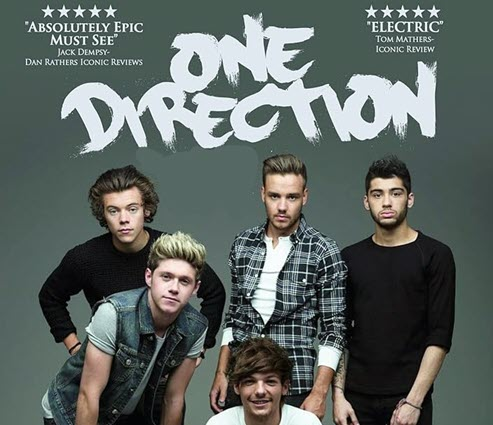

StatementMeta(, 4a03db4d-604d-448e-a046-62240f91359e, 21, Finished, Available)

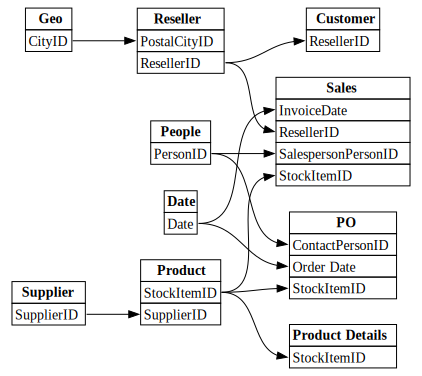

In [10]:
plot_relationship_metadata(relationships)

In [11]:
df_columns[df_columns['Table Name'] == 'Date']

StatementMeta(, 4a03db4d-604d-448e-a046-62240f91359e, 22, Finished, Available)

,Table Name,Column Name,Description,Type,Data Type,Hidden,Format String,Source,Data Category,Display Folder,...,Unique,Sort By Column,Summarize By,Is Available in MDX,Encoding Hint,State,Error Message,Alternate Of Base Column,Alternate Of Base Table,Modified Time
13,Date,Date,,Data,DateTime,False,General Date,Date,,,...,False,None,None,True,Default,Ready,,None,None,2024-05-20 14:33:41
14,Date,Year,,Data,Int64,False,0,Year,,,...,False,None,Sum,True,Default,Ready,,None,None,2024-05-20 14:33:41
15,Date,Month,,Data,Int64,False,0,Month,,,...,False,None,Sum,True,Default,Ready,,None,None,2024-05-20 14:33:41
16,Date,Quarter,,Data,Int64,False,0,Quarter,,,...,False,None,Sum,True,Default,Ready,,None,None,2024-05-20 14:33:41
17,Date,Month Name,,Data,String,False,,Month_Name,,,...,False,None,None,True,Default,Ready,,None,None,2024-05-20 15:03:05
18,Date,Short Month Name,,Data,String,False,,Short_Month_Name,,,...,False,None,None,True,Default,Ready,,None,None,2024-05-20 15:03:05


### Get the same data from the lakehouse tables and the semantic model

##### Load data from the lakehouse, **rebuilding the sales logic by summing Sales.Sales_Amount**

In [26]:
from pyspark.sql.functions import month, year, col
df_lakehouse = spark.sql("SELECT * FROM Fabrikam.Sales")

# Aggregate the total quantity data to a monthly level
df_lakehouse_agg = df_lakehouse.withColumn("Month", month("InvoiceDate"))\
.withColumn("Year", year("InvoiceDate"))\
.groupBy("Year", "Month")\
.sum("Sales_Amount")\
.orderBy("Year", "Month")

display(df_lakehouse_agg.limit(5))

StatementMeta(, 4a03db4d-604d-448e-a046-62240f91359e, 37, Finished, Available)

SynapseWidget(Synapse.DataFrame, 6c094201-ff88-4eb0-8701-5c5777016583)

##### Load the same data from the semantic model, **using a measure instead of duplicating the measure logic**

In [44]:
# Load the same data from the semantic model, using a measure instead of duplicating the measure logic
df_semantic_model = (
    fabric.evaluate_measure(
        workspace=workspace_name,
        dataset=semantic_model_name,
        groupby_columns=["'Date'[Year]", "'Date'[Month]"],
        measure='Sales'#,
        #filters={"date[year]": [2022]}
    )
)
df_semantic_model.head()

StatementMeta(, 91483e99-c627-4de1-8e62-ef085631977a, 67, Finished, Available)

,Year,Month,Sales
0,2020,1,2540736.3
1,2020,2,1886918.8
2,2020,3,2524270.75
3,2020,4,2742092.45
4,2020,5,2932722.85


In [28]:
# Prepare for Prophet
df_semantic_model['ds'] = pd.to_datetime(df_semantic_model[['Year', 'Month']].assign(DAY=1))
df_semantic_model['y'] = df_semantic_model['Sales']

df_semantic_model.head()

StatementMeta(, 4a03db4d-604d-448e-a046-62240f91359e, 39, Finished, Available)

,Year,Month,Sales,ds,y
0,2020,1,2540736.3,2020-01-01,2540736.3
1,2020,2,1886918.8,2020-02-01,1886918.8
2,2020,3,2524270.75,2020-03-01,2524270.75
3,2020,4,2742092.45,2020-04-01,2742092.45
4,2020,5,2932722.85,2020-05-01,2932722.85


### Get a forecast for future sales

In [39]:
!pip install prophet

from pyspark.sql import SparkSession
from pyspark.sql.functions import month, year, col
from prophet import Prophet

# Initialize Spark session
spark = SparkSession.builder.appName("Prophet Forecasting").getOrCreate()

# Prepare the data for Prophet
df_semantic_model['ds'] = pd.to_datetime(df_semantic_model[['Year', 'Month']].assign(DAY=1))
df_semantic_model['y'] = df_semantic_model['Sales']

# Fit the Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False,daily_seasonality=False)
model.fit(df_semantic_model[['ds', 'y']])

# Create a DataFrame for future predictions (e.g., next 12 months)
future = model.make_future_dataframe(periods=12, freq='M')

# Forecast
forecast = model.predict(future)

StatementMeta(, 91483e99-c627-4de1-8e62-ef085631977a, 62, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 74.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 40.5 MB/s eta 0:00:00
input tempfile: /tmp/tmppc8xelfp/nnyzt6la.json
input tempfile: /tmp/tmppc8xelfp/yc7348r5.json
idx 0
running CmdStan, num_threads: None
CmdStan args: ['/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54129', 'data', 'file=/tmp/tmppc8xelfp/nnyzt6la.json', 'init=/tmp/tmppc8xelfp/yc7348r5.json', 'output', 'file=/tmp/tmppc8xelfp/prophet_model6pdjedve/prophet_model-20240521165628.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
Chain [1] start processing
Chain [1] done processing


16:56:28 - cmdstanpy - INFO - Chain [1] start processing
16:56:28 - cmdstanpy - INFO - Chain [1] done processing


StatementMeta(, 91483e99-c627-4de1-8e62-ef085631977a, 63, Finished, Available)

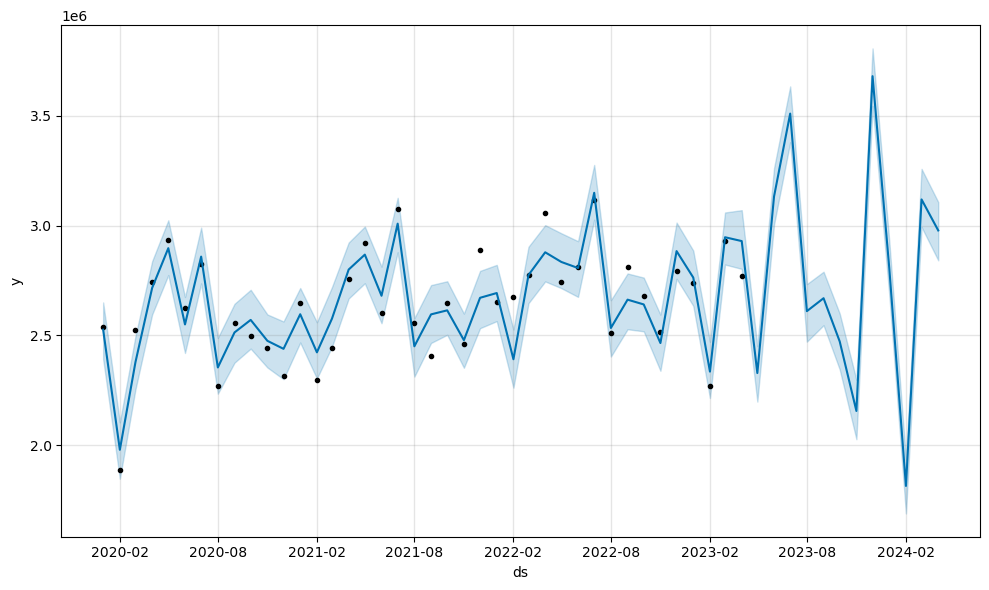

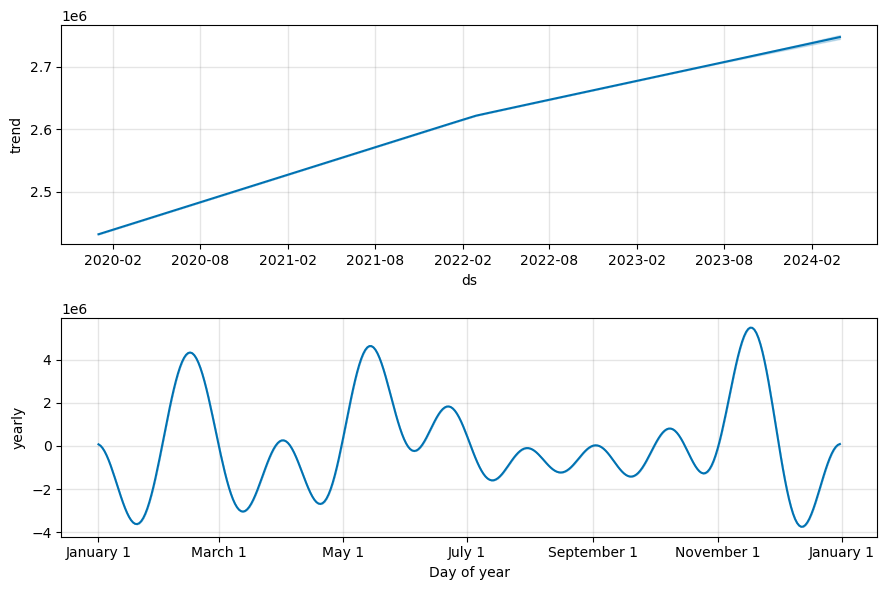

In [40]:
# Plotting the forecast
model.plot(forecast);
model.plot_components(forecast);

In [32]:
# View the forecast as a table
display(forecast)

StatementMeta(, 4a03db4d-604d-448e-a046-62240f91359e, 43, Finished, Available)

SynapseWidget(Synapse.DataFrame, 8f72af75-0b07-4211-a357-5327e24745ac)

In [33]:
# Write the forecast data to a table called Sales_Forecast in the attached lakehouse
spark.createDataFrame(forecast).write.saveAsTable("Sales_Forecast", mode="overwrite")

StatementMeta(, 4a03db4d-604d-448e-a046-62240f91359e, 44, Finished, Available)

### Next Steps
##### Add the forecast table to the semantic model to display the sales forecast in the report.
##### Include the prediction logic into the ETL process so predictions are added at the end, and use semantic link to refresh the model. The model feeds the prediction, which feeds the model. So very inception!

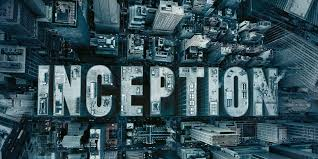

#### Thank you!